<a href="https://colab.research.google.com/github/P-RAJESWARI/Linear-Algebra/blob/main/Diagonalization/Diagonalization_Notebook2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

T(x)=Ax where A=[[4,2],[1,5]]

A can be factorized as A=PDP^-1

where,

 P is the basis matrix consists of basis in its column

 D is the Diagonal matrix consists of non-zero elements in diagonal only

 A=[[2,1],[-1,1]]*[[3,0],[0,6]]*[[1/3,-1/3],[1/3,2/3]]

 Here P is [[2,1],[-1,1]]

 where Basis B=[[2],
                [-1]]
                
and another basis is [[-1],[1]]

1.**P is invertible .Therefore columns of P are linearly independent .Why?**

Since P is the basis matrix . Basis are linearly independent and hence the P is invertible in R^2

2.**B is new basis in R^2. Why?**

Since the basis are linearly independent in R^2 .B is the new basis in R^2

If we take a vector x=[[2],[1]]

Multiplying A*x as PDP^-1 * x

P^-1 * x gives vector in the basis B - [x]B

D * [x]B will stretches or scales the vector [x]B - x1

P * x1 will give the vector in the standard basis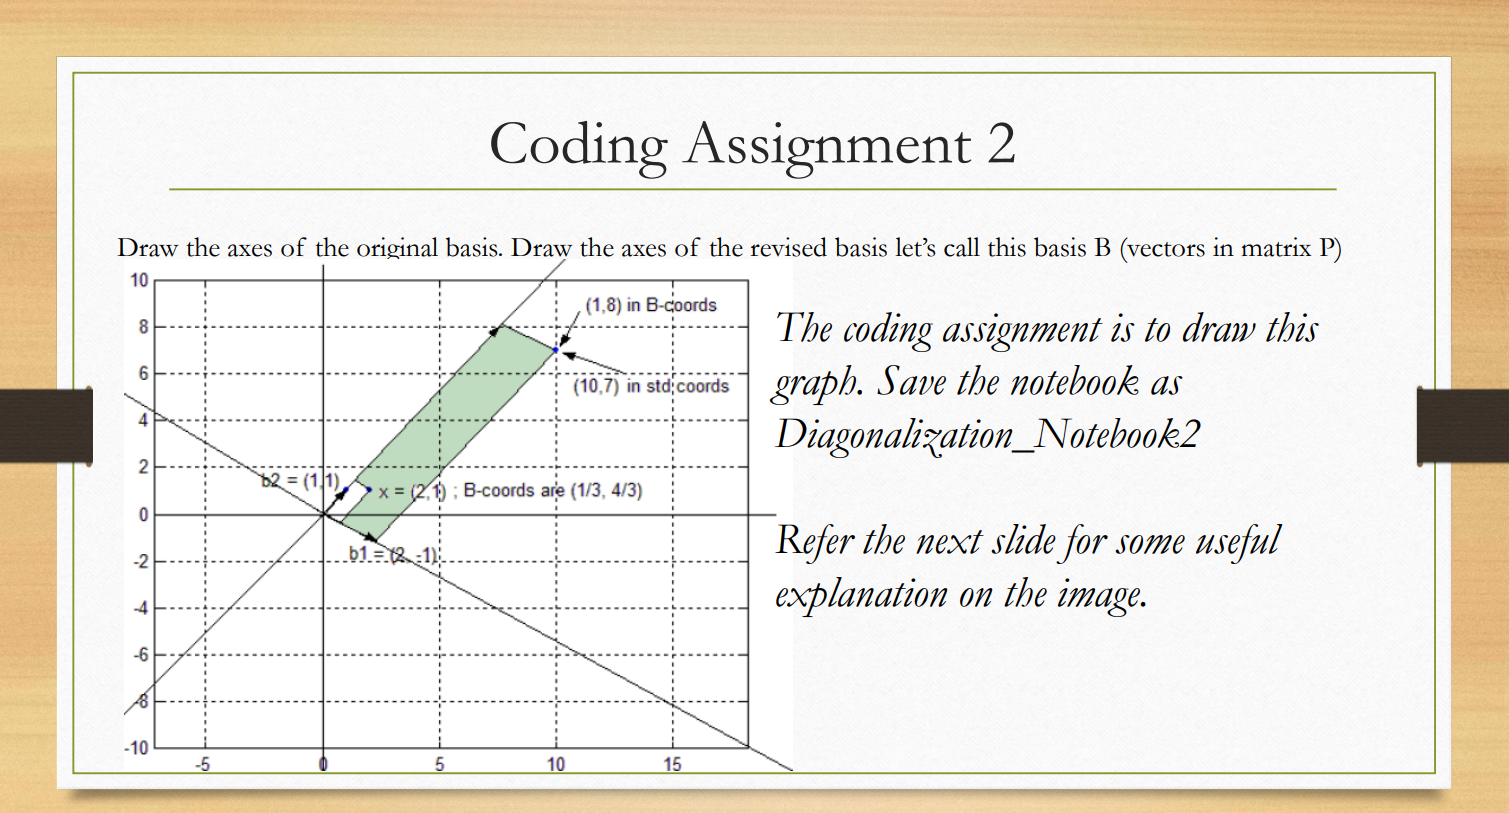

1. x= [[2],[1]]; the same geometric point, named in B-coordinates, is
[p] =[ 1/3,4/3]

2. Rescaling [x]B by the factors 3 and 6 in the b₁ and b₂ directions
gives a new point whose name in B-coordinates is [[1],[8]] expressed in B coordinates.

3. This new point has a different name in standard coordinates. If we convert the B-coordinates back to standard coordinates, we get [[10],[7]]=A[[2],[1]] expressed in standard coordinates.


In [73]:
#Importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp

In [74]:
#Performs diagonalization that is factorize the given matrix as the combination of diagonal matrix A=PDP^-1
def diagonalization(A):
  #This diagonalize() is used which will automatically give the matrix P which is the basis matrix and the Diagonalize matrix
  P,D=A.diagonalize()
  print("Matrix P:",P)
  print("Diagonal Matrix D:",D)
  #To change the P matrix as per the question
  #In sympy matrix if P=[[-2,1],[1,1]], 2 is at index P[0] ,1 in first row is at index P[1] ,the index is assigned row wise
  P[0]=-P[0]
  P[2]=-P[2]
  print("Modified P as per the question ",P)
  #Finding inverse of the matrix by using the inv() in sympy array
  #Since P consists of basis vectors , each column is linearly independent ,So inverse of P definitely exists
  Pinv=P.inv()
  print("Inverse of the matrix P is ",Pinv)
  return P,D,Pinv

In [76]:
#Define a matrix A as sympy matrix which is to be factorized as PDP^-1
A=sp.Matrix([[4,2],[1,5]])
P,D,Pinv=diagonalization(A)

Matrix P: Matrix([[-2, 1], [1, 1]])
Diagonal Matrix D: Matrix([[3, 0], [0, 6]])
Modified P as per the question  Matrix([[2, 1], [-1, 1]])
Inverse of the matrix P is  Matrix([[1/3, -1/3], [1/3, 2/3]])


In [78]:
def plot_graph(P, P1, D, x):
    start = np.array([0, 0])  # Start point

    # Extract column vectors from P and convert to numpy arrays
    end_b1 = np.array(P.col(0).evalf()).astype(np.float64).flatten()  # (2, -1)
    print(end_b1)
    end_b2 = np.array(P.col(1).evalf()).astype(np.float64).flatten()  # (1, 1)

    # Perform matrix multiplications and convert to numpy arrays
    x_b = np.array((P1 * x).evalf()).astype(np.float64).flatten()  # x in the basis of P (x in basis P= Pinv*x= (1/3,4/3)=(0.33,1.33))
    stretched_x = np.array((D * (P1 * x)).evalf()).astype(np.float64).flatten()  # Stretched x when multiplies x in basis of P with diagonal matrix (1,8)
    std_coords = np.array((P * D * P1 * x).evalf()).astype(np.float64).flatten()  # Standard coordinates when multiplying strected x in basis of P with the P (10,7)

    # Coordinates along basis vectors
    std_stretched_x_along_b2 = end_b2 * stretched_x[1]  # (8, 8)
    std_stretched_x_along_b1 = end_b1 * stretched_x[0]  # (2, -1)
    x_along_b2 = end_b2 * x_b[1]
    x_along_b1 = end_b1 * x_b[0]

    # Create a figure and axis
    fig, ax = plt.subplots()

    # Plot arrows
    ax.plot([std_stretched_x_along_b2[0] - 0.3, 15 * end_b2[0]], [std_stretched_x_along_b2[1] - 0.3, 15 * end_b2[1]], color='black')
    ax.plot([0, -11 * end_b2[0]], [0, -11 * end_b2[1]], color='black')
    ax.plot([end_b1[0] - start[0] - 0.3, 10 * end_b1[0]], [end_b1[1] - start[1] + 0.03, 10 * end_b1[1]], color='black')
    ax.plot([0, -4 * end_b1[0]], [0, -4 * end_b1[1]], color='black')

    ax.plot([std_stretched_x_along_b2[0], std_coords[0]], [std_stretched_x_along_b2[1], std_coords[1]], color='black')
    ax.plot([std_stretched_x_along_b1[0], std_coords[0]], [std_stretched_x_along_b1[1], std_coords[1]], color='black')

    ax.arrow(*start, end_b1[0] - start[0] - 0.3, end_b1[1] - start[1] + 0.03, head_width=0.3, head_length=0.3, fc='red', ec='red')
    ax.arrow(*start, end_b2[0] - start[0] - 0.3, end_b2[1] - start[1] - 0.3, head_width=0.3, head_length=0.3, fc='red', ec='red')
    ax.scatter(end_b1[0], end_b1[1], color='green')
    ax.scatter(end_b2[0], end_b2[1], color='green')
    # Annotate vectors along basis vectors
    plt.plot([x_along_b1[0], x[0,0]], [x_along_b1[1], x[1,0]], color='black', linestyle='--', linewidth=1)
    plt.plot([x_along_b2[0], x[0,0]], [x_along_b2[1], x[1,0]], color='black', linestyle='--', linewidth=1)


    ax.scatter(x[0], x[1], color='green')
    ax.scatter(std_coords[0], std_coords[1], color='green')
    ax.arrow(*(end_b2[0], end_b2[1]), std_stretched_x_along_b2[0] - end_b2[0] - 0.3, std_stretched_x_along_b2[1] - end_b2[1] - 0.3, head_width=0.3, head_length=0.3, fc='green', ec='green')




    # Add labels near the arrow heads
    ax.annotate(f'b1 = {end_b1}', xy=(end_b1[0] + 1, end_b1[1] - 1.01), xytext=(-20, 15), textcoords='offset points')
    ax.annotate(f'b2 = {end_b2}', xy=(end_b2[0] - 1, end_b2[1] - 0.5), xytext=(-20, 15), textcoords='offset points')
    ax.annotate(f'x = {x.tolist()}; {np.round(x_b, 2)}', xy=(x[0], x[1]), xytext=(5, -5), textcoords='offset points')
    ax.annotate(f'{stretched_x}\n{std_coords}', xy=(std_coords[0], std_coords[1]), xytext=(5, -5), textcoords='offset points')

    # Set limits and labels
    ax.set_xlim(-5, 15)
    ax.set_ylim(-5, 15)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')

    # Show plot
    plt.grid()
    plt.show()




[ 2. -1.]


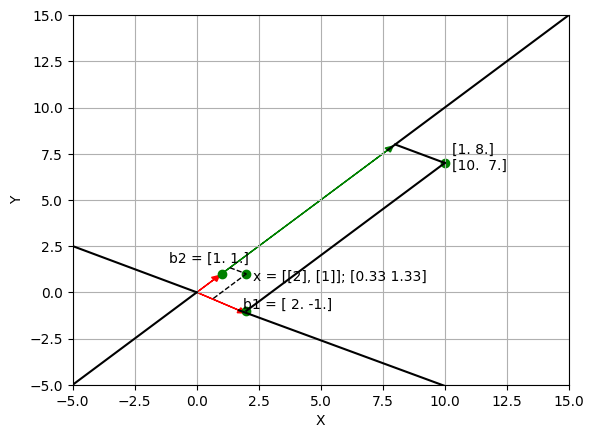

In [77]:
x=sp.Matrix([[2],[1]])
plot_graph(P,Pinv,D,x)